In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
def harmonic_oscillator(omega, x0, N=100, k=2, h=0.01):
    """
    Computes the first k eigenvalues of the one dimensional quantum harmonic oscillator
    discretizing the Hamiltonian with the finite difference method.
    
    Parameters:
        omega: frequency defined in the Hamiltonian
        x0: [-x0, x0] defines the range in which the potential will act
        N: size of the matrix
        k: number of eigenvalues we want
        h: step of the discretization
    """
    x = np.linspace(-x0, x0, N)
    H_ij = (-1/h**2)*np.ones(N-1)
    H_ii = (2/h**2)*np.ones(N) + (omega**2)*x**2
    
    H = np.diag(H_ii) + np.diag(H_ij, 1) + np.diag(H_ij, -1)
    
    eigenvalue, eigenvector = np.linalg.eigh(H)
    
    return eigenvalue[:k], eigenvector

#### Check normalization

In [3]:
test = harmonic_oscillator(0.8, 8, 2000, 10)

In [4]:
normalization = []
change = []

for i in range(len(test[1])):
    norm = np.dot(test[1][i], test[1][i])
    corr = np.dot(test[1][i], test[1][0])
    
    normalization.append(norm)
    change.append(corr)

In [5]:
max(normalization), min(normalization), max(change[1:]), min(change)

(1.0000000000000022,
 0.9999999999999981,
 8.318608931030813e-16,
 -4.449769003787851e-16)

Vectors are orthonormal, $<\psi_i|\psi_j> = \delta_{ij}$

In [6]:
def plot_harmonic_oscillator(omega, x0, N=100, k=2, h=0.01):
    """
    Plots the wavefunctions of a harmonic_oscillator
    Parameters:
        omega: frequency defined in the Hamiltonian
        x0: [-x0, x0] defines the range in which the potential will act
        N: size of the matrix
        k: number of eigenvalues we want
    """
    eigenval, eigenvect = harmonic_oscillator(omega, x0, N, k,h)
    
    x = np.linspace(-x0,x0,N)
    V = (omega**2)*x**2
    
    fig, axes = plt.subplots(1,2, figsize=(15,7))
    sns.lineplot(x,V, linestyle='--', color='red', ax=axes[0])
    for i in range(k):
        wavefunction = eigenvect[:,i]
        sns.scatterplot(x,wavefunction + eigenval[i], ax=axes[0])
    
    upper_lim = max(eigenvect[len(eigenval)]) + eigenval[-1] + omega/2
    axes[0].set_ylim((0, upper_lim))
    axes[0].set(xlabel='x', ylabel='V(x)')
    axes[0].set_title('Wavefunctions representation for the first {}-eigenstates\n$\omega$ = {}'.format(k,omega))
    #plt.gca().get_yaxis().set_visible(False)
    
    # Compare the eigenvalues of the simulation with the theoretical ones
    E_theo = [(omega/2)*(i + 0.5) for i in range(k)]
    energy_levels = pd.DataFrame({'n': range(k), 'Energy': eigenval, 'Method': 'Simulation eigenvalues'}).append(
        pd.DataFrame({'n': range(k), 'Energy': E_theo, 'Method': 'Theoretical Energy levels'}))
    sns.scatterplot(data=energy_levels, x='n', y='Energy', hue='Method')
    axes[1].set_title('Comparison between computed eigenvalues with theoretical ones\nN = {}'.format(N))
    
    # Compute the relative error of the simulated eigenvalues
    abs_error = np.abs(E_theo - eigenval)
    relative_error = abs_error/np.abs(E_theo)
    return np.mean(relative_error)

### Test the results

#### Change $N$, the dimension of the matrix, with fixed $\omega$ and interval $[-x_0,x_0]$

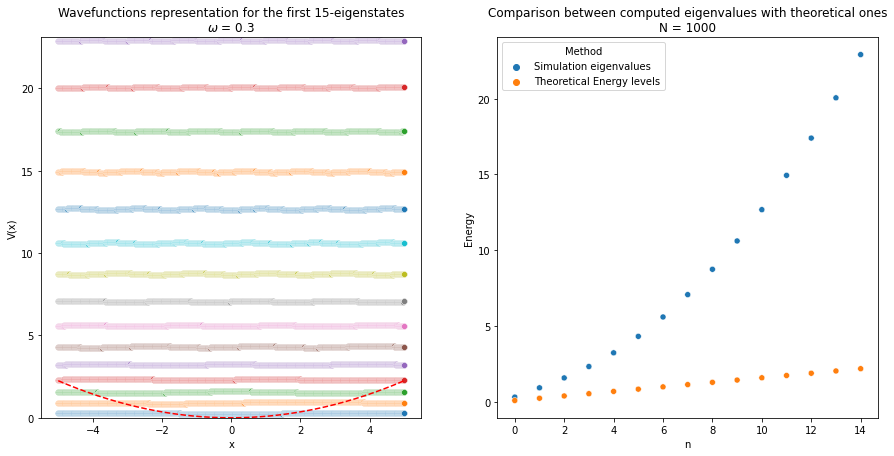

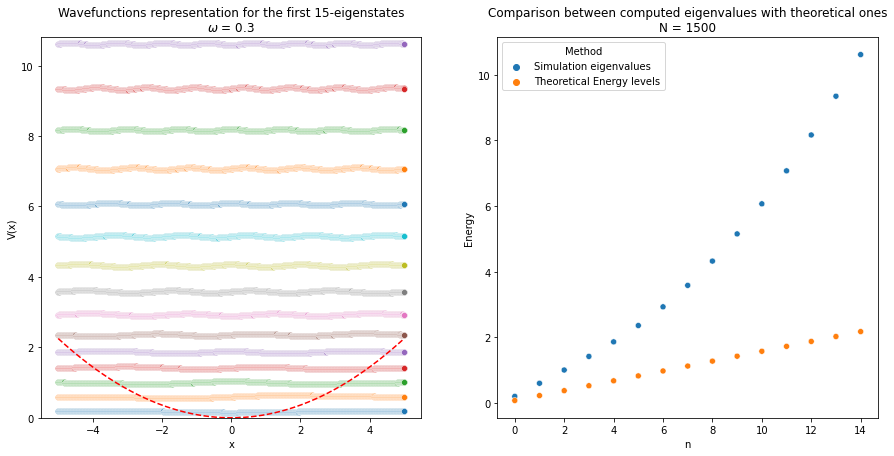

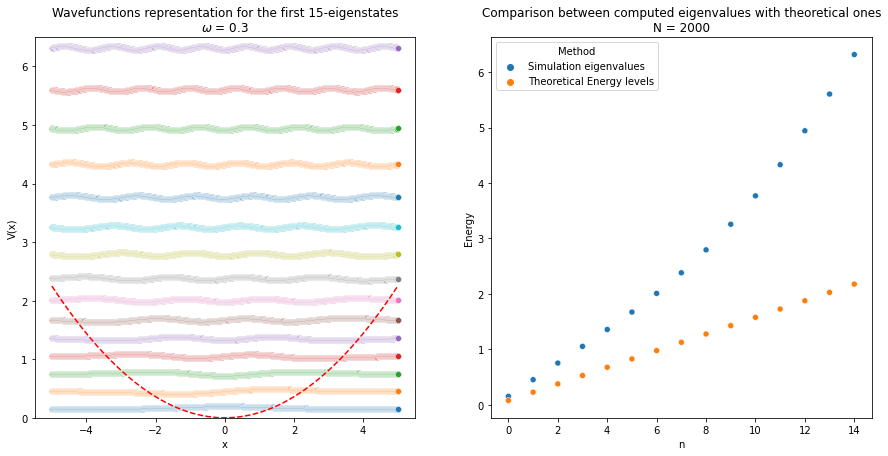

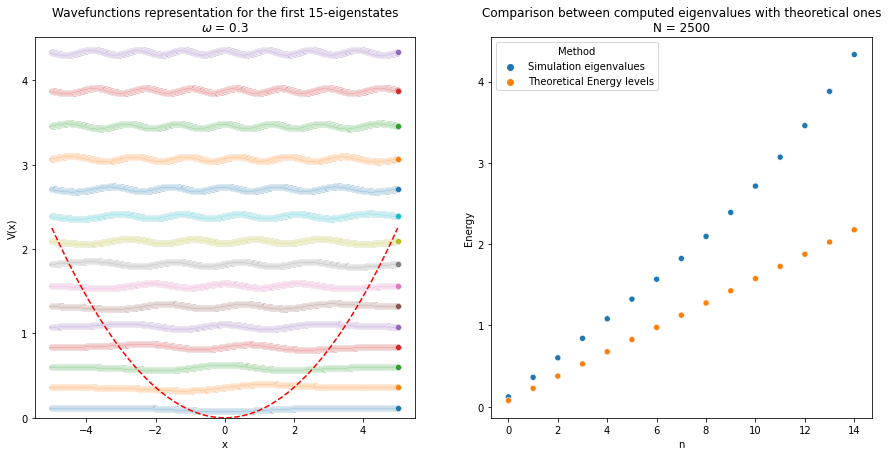

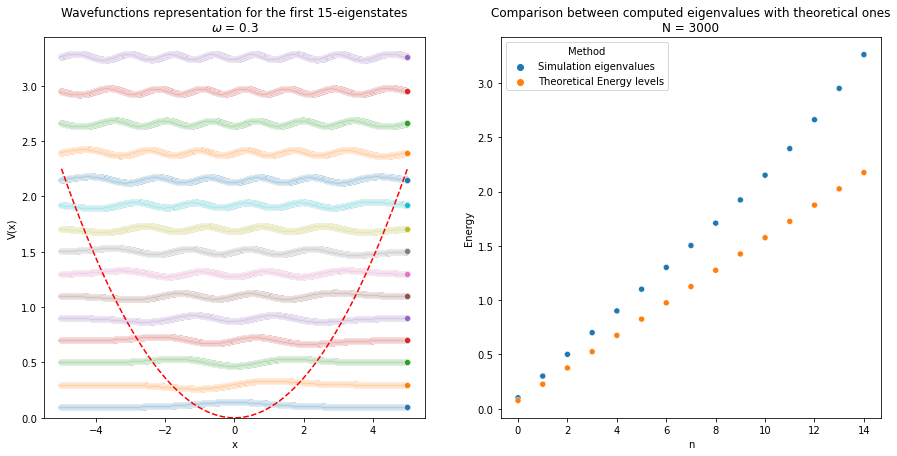

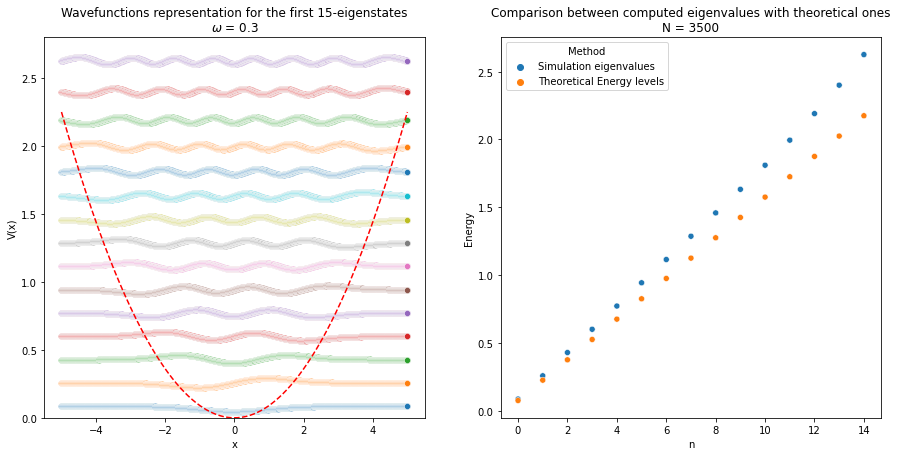

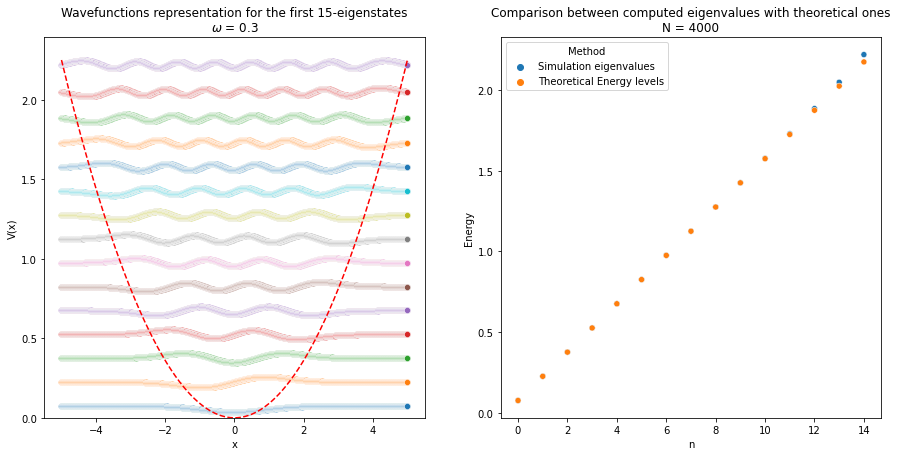

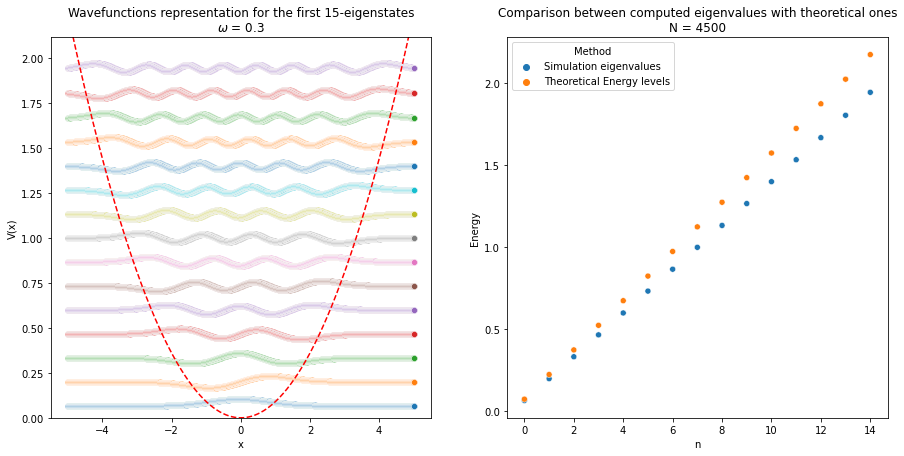

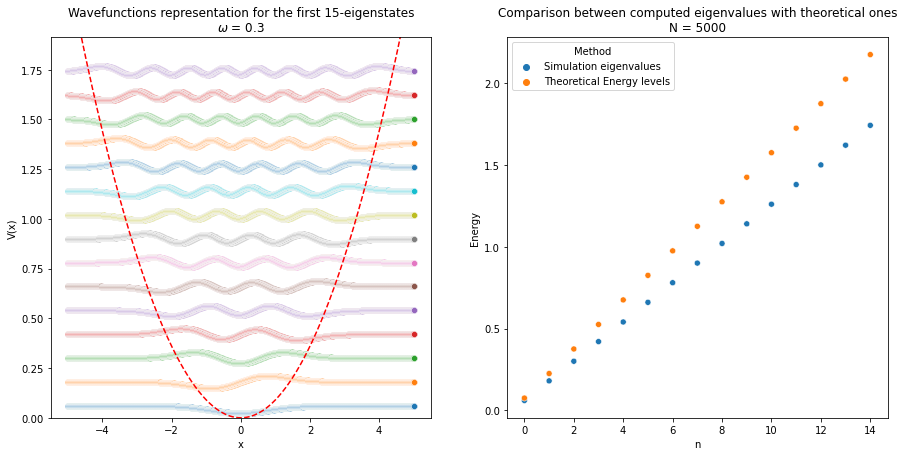

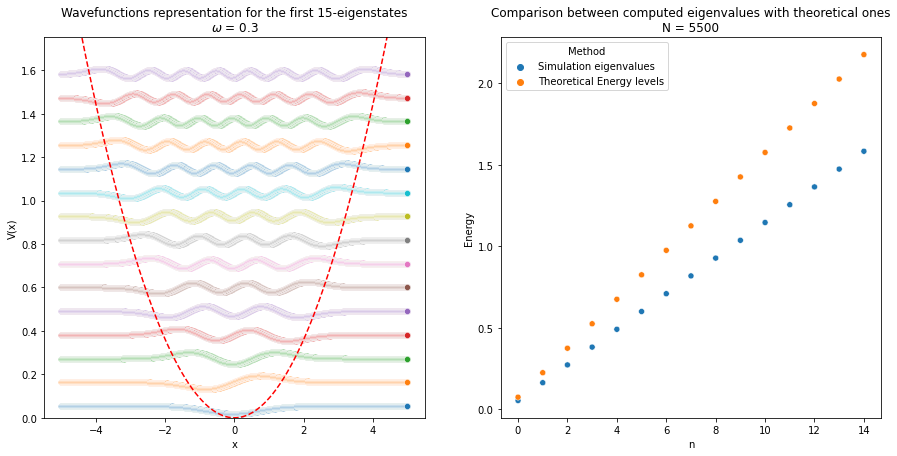

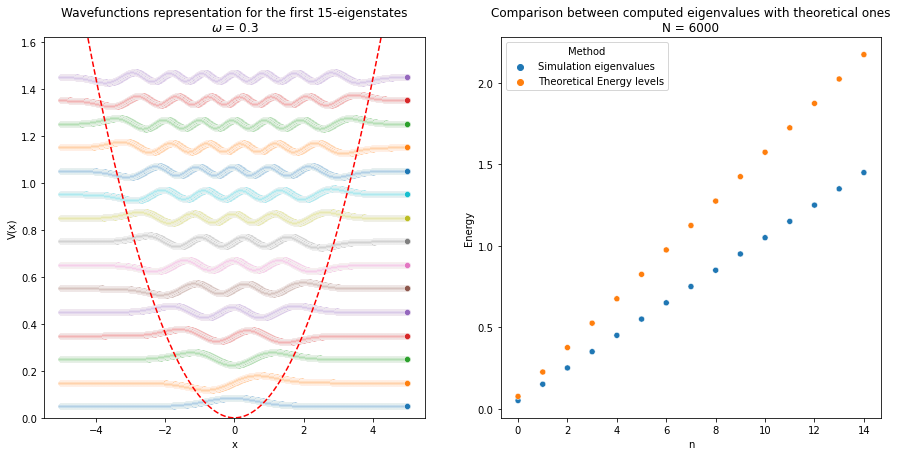

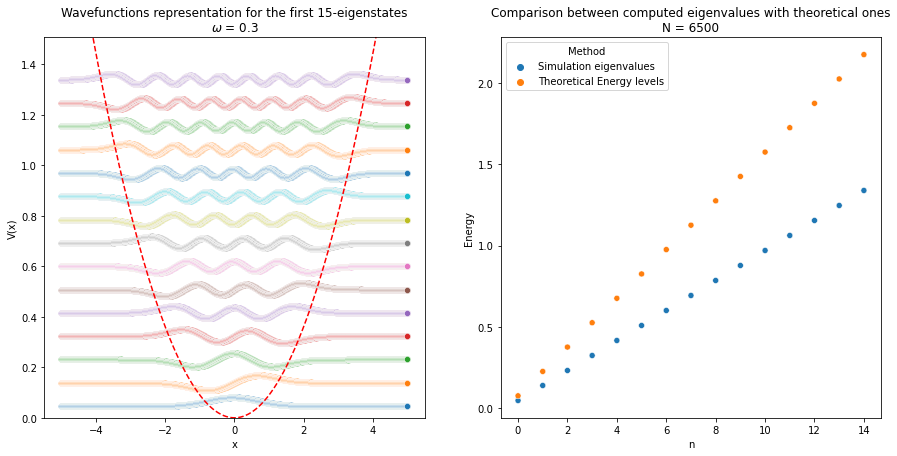

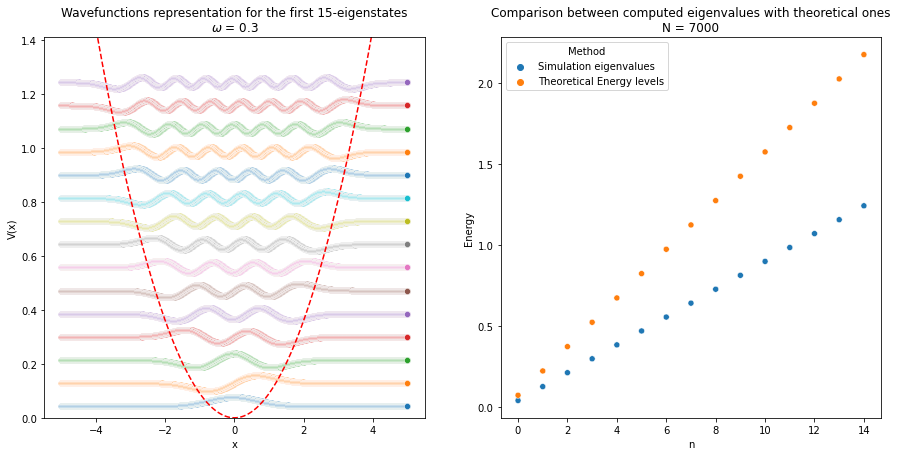

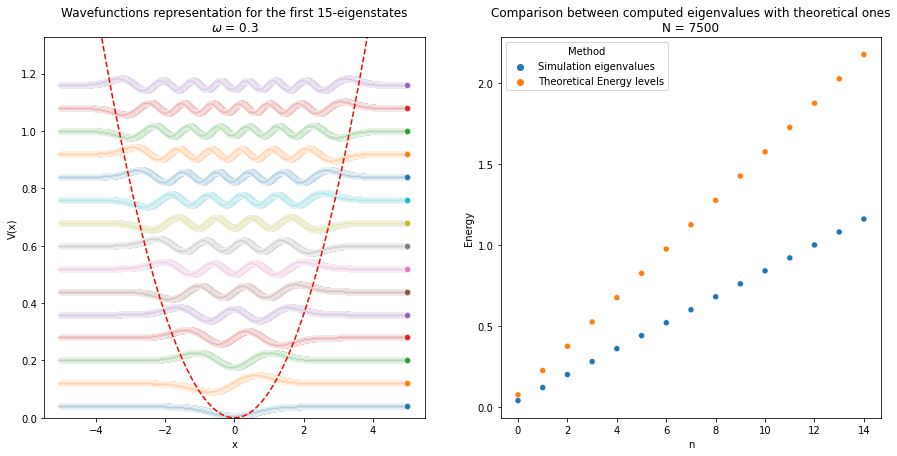

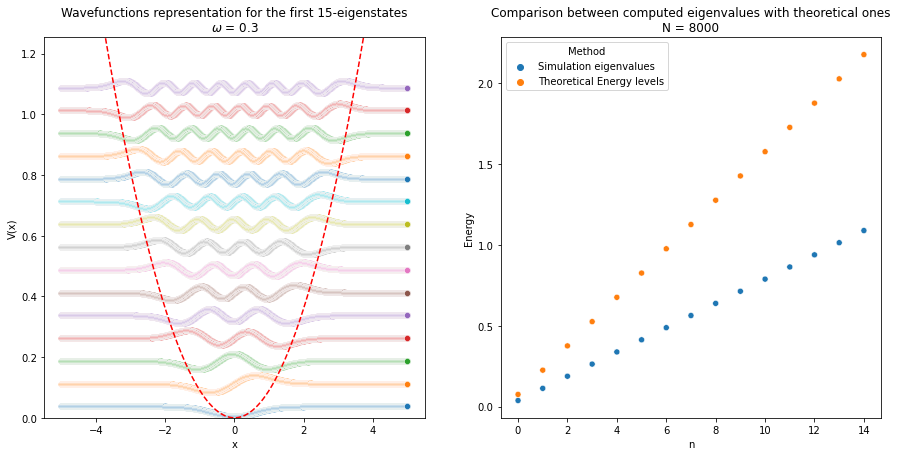

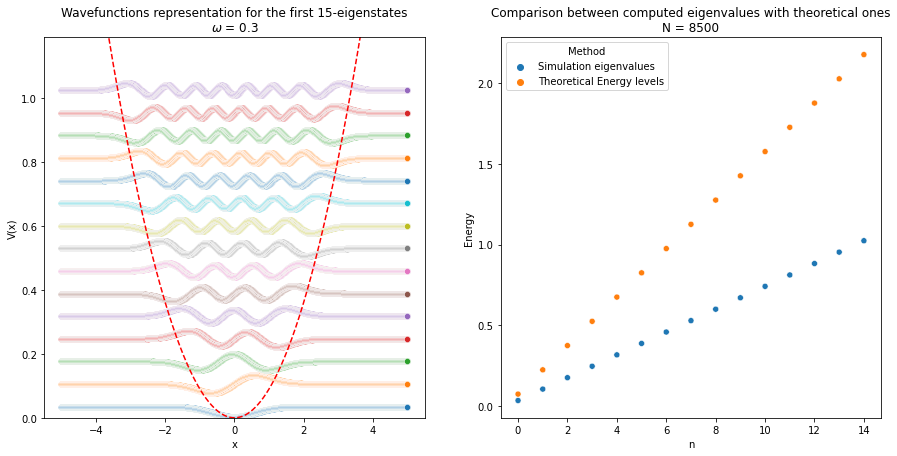

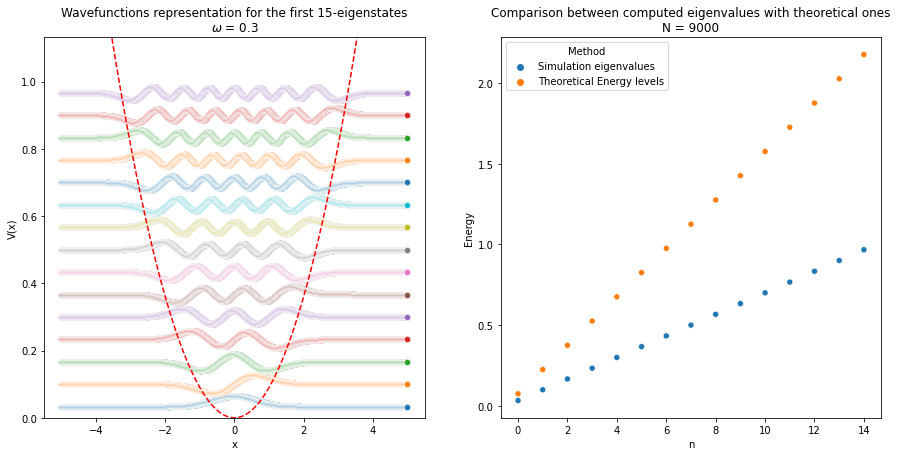

In [7]:
omega = 0.3
x_range = 5
k_eigenvals = 15

N = []
error = []
for i in range(1000,9100,500):
    N.append(i)
    # Compute the relative error of the calculated eigenstates
    error.append(plot_harmonic_oscillator(omega,x_range,i,k_eigenvals)) 

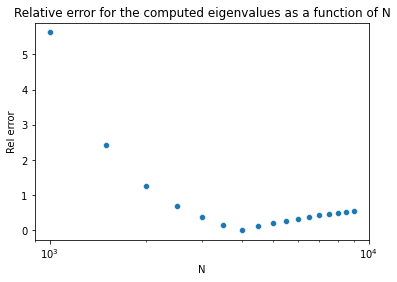

In [8]:
sns.scatterplot(N,error).set(xlabel='N', ylabel='Rel error', 
                             title='Relative error for the computed eigenvalues as a function of N')

plt.xscale('log')

In [9]:
change_N = pd.DataFrame({'N': N, 'error': error})
change_N[change_N['error'] == min(change_N['error'])]

,N,error
6,4000,0.002991


#### Change the interval $[-x0,x0]$ for a given $\omega$ and the best $N$ found before

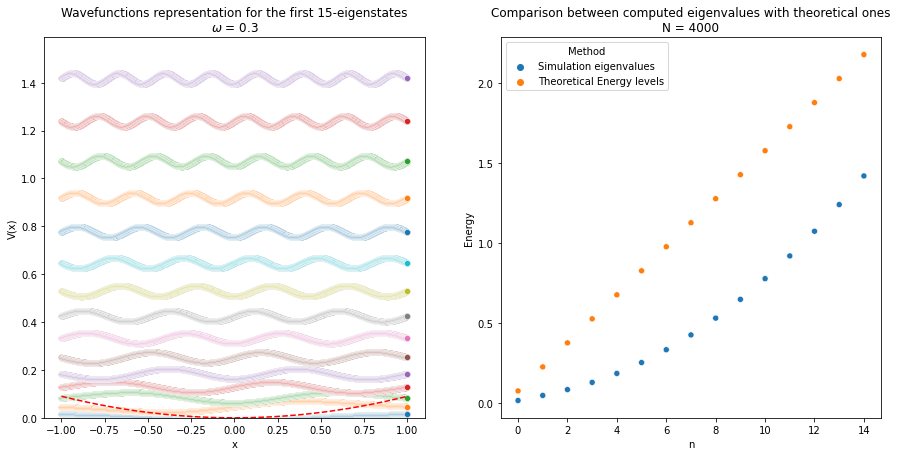

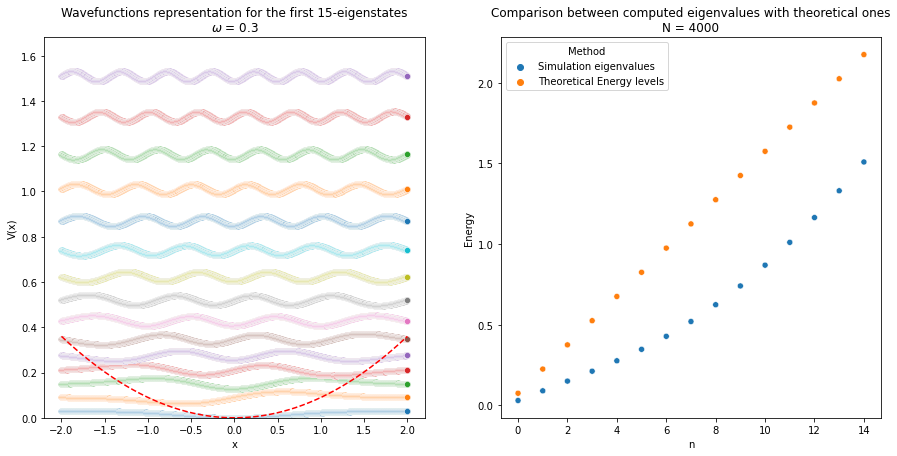

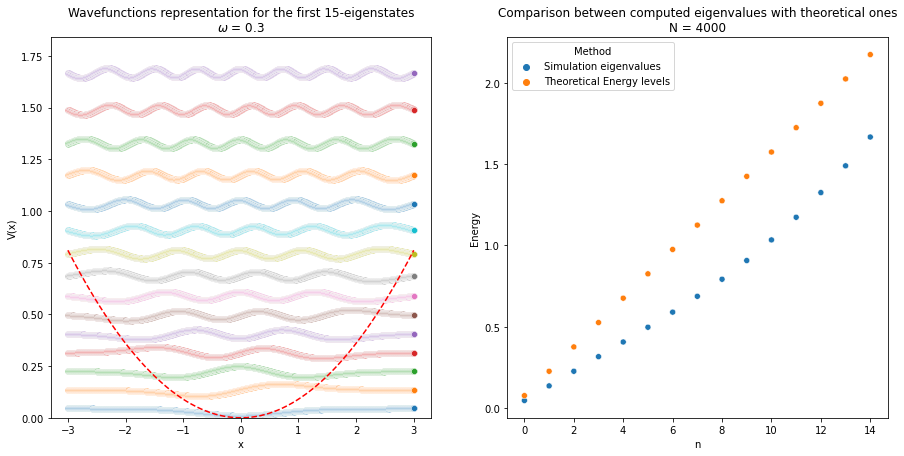

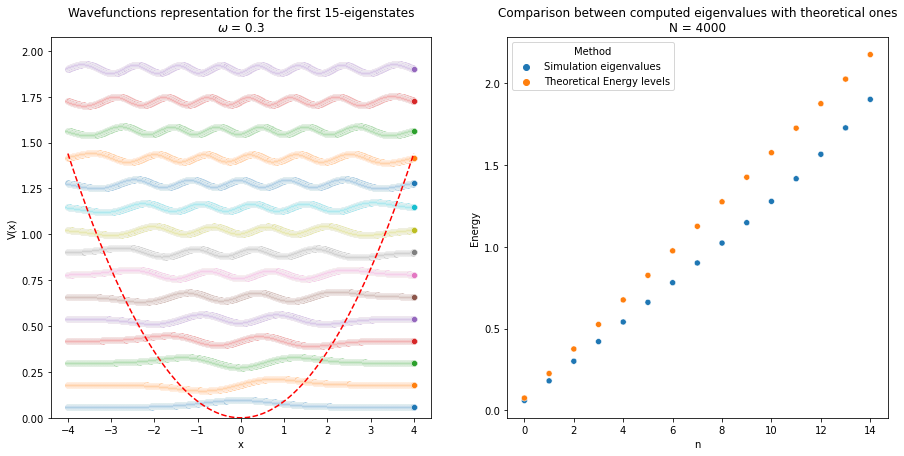

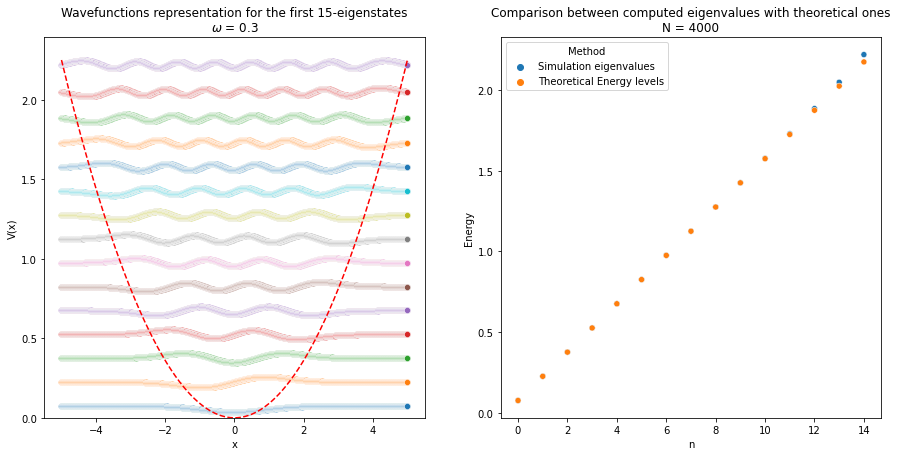

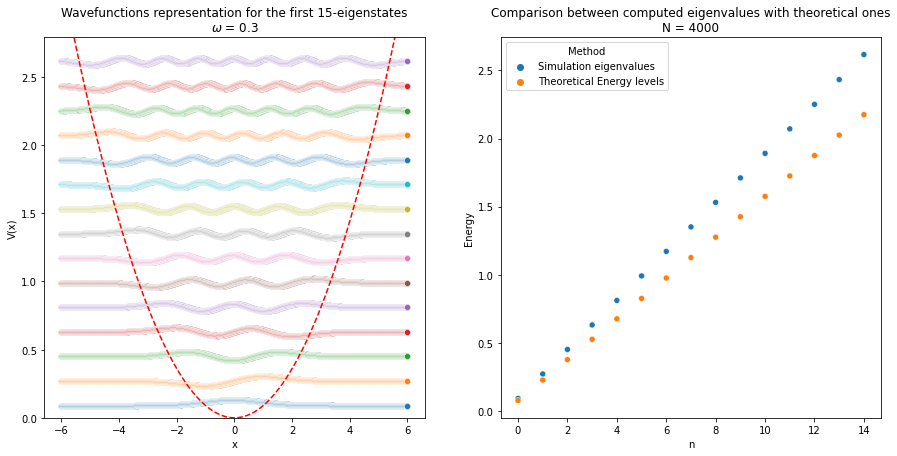

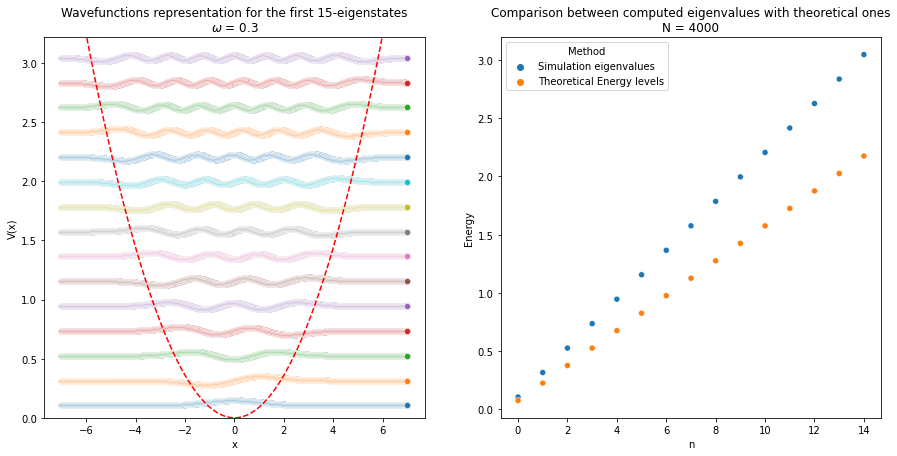

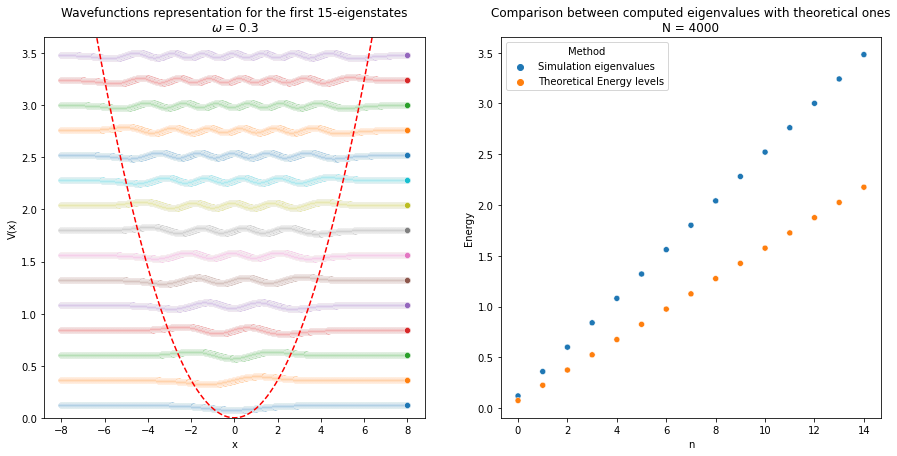

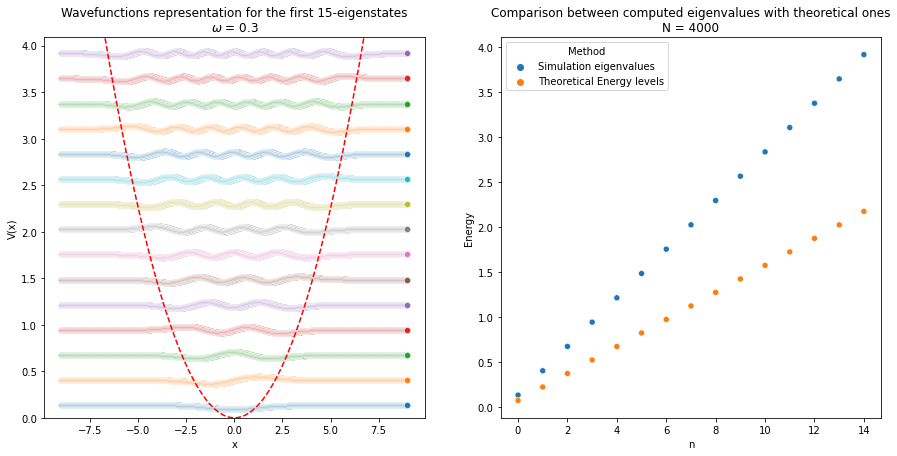

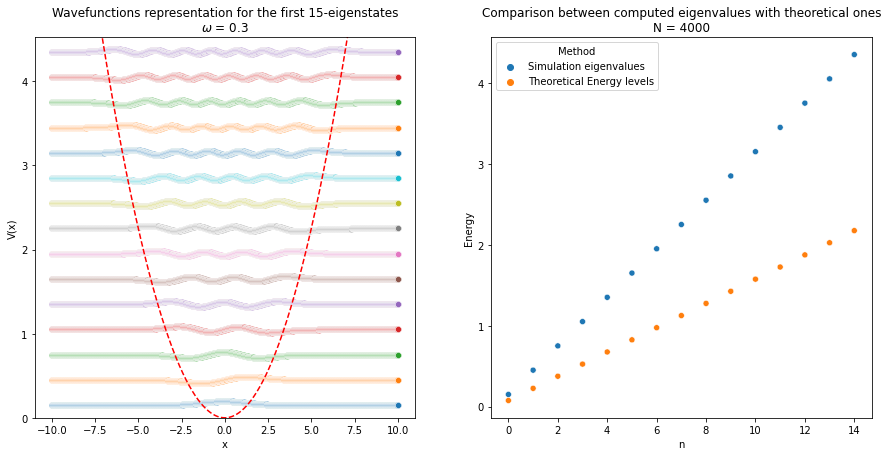

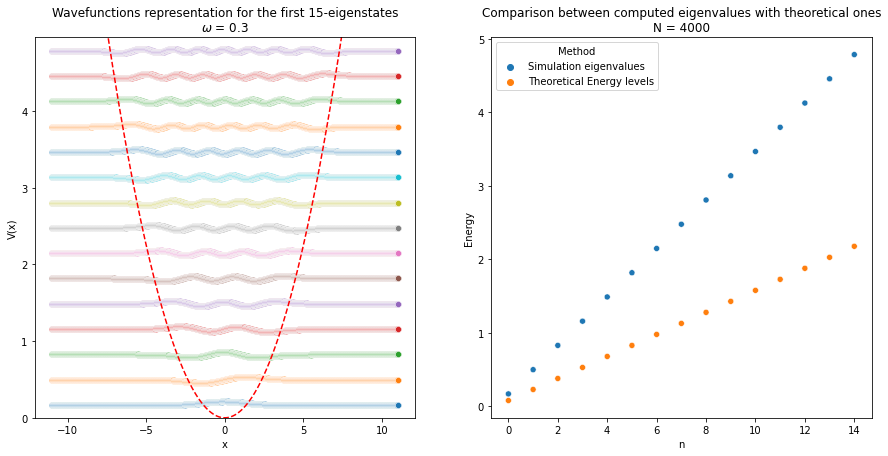

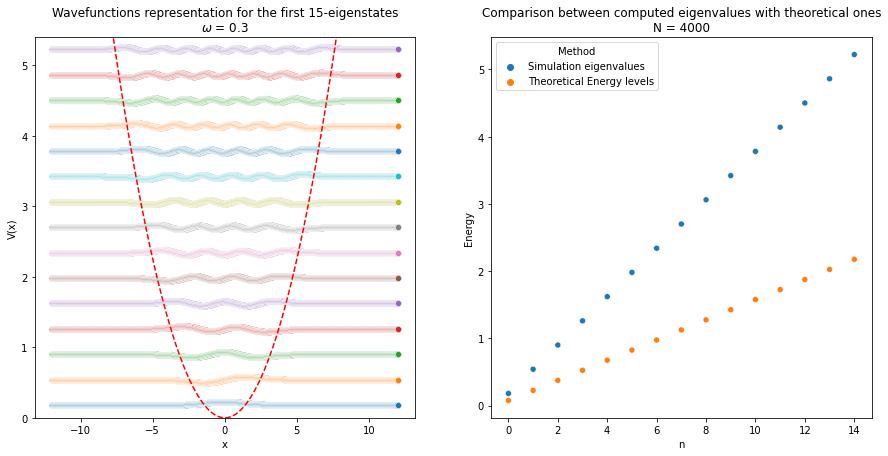

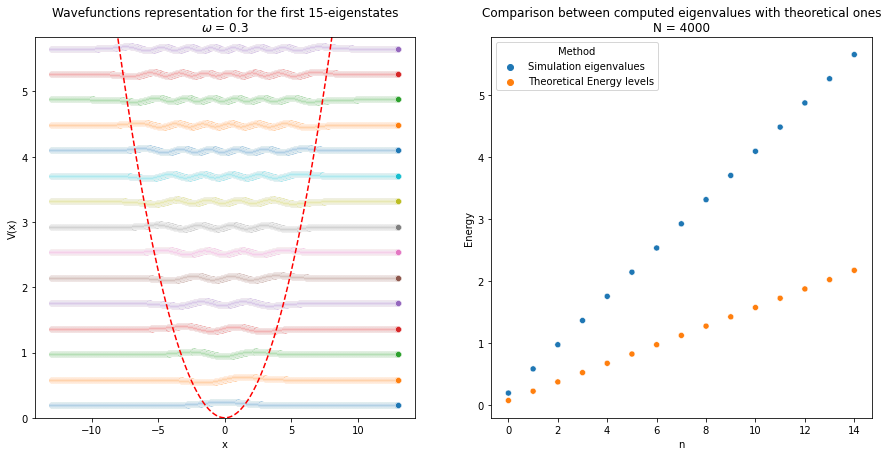

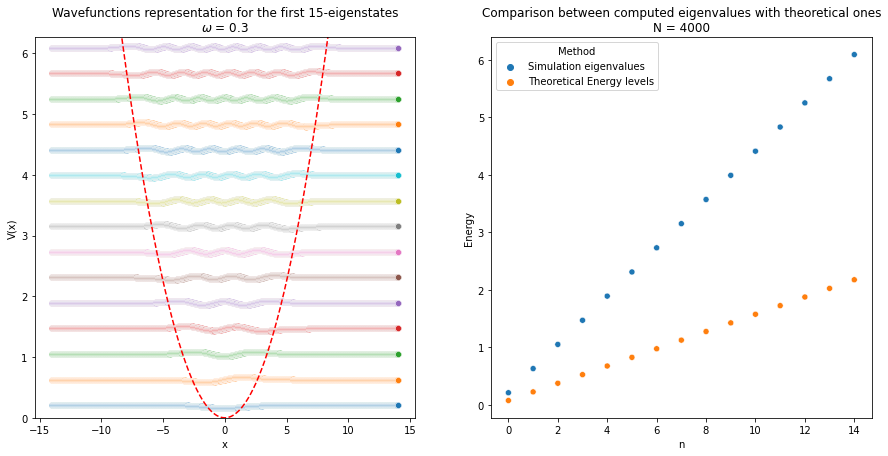

In [10]:
best_N = int(change_N[change_N['error'] == min(change_N['error'])]['N'])
x_range_test = []
k_eigenval = 15
error_test2 = []

for xr in range(1,15,1): # Change x
    x_range_test.append(xr)
    error_test2.append(plot_harmonic_oscillator(omega, xr, best_N, k_eigenval))
    #plt.close()

[Text(0.5, 0, 'x'),
 Text(0, 0.5, 'Rel error'),
 Text(0.5, 1.0, 'Relative error for the computed eigenvalues as a function x')]

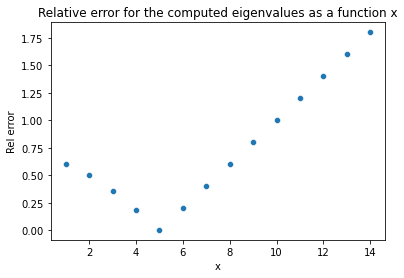

In [11]:
sns.scatterplot(x=x_range_test, y=error_test2).set(xlabel='x', ylabel='Rel error', 
                             title='Relative error for the computed eigenvalues as a function x')
#plt.xscale('log')
#plt.yscale('log')

In [12]:
change_x = pd.DataFrame({'x':x_range_test, 'error': error_test2})
change_x[change_x['error'] == min(change_x['error'])]

,x,error
4,5,0.002991


#### Test the results with diferent $\omega$

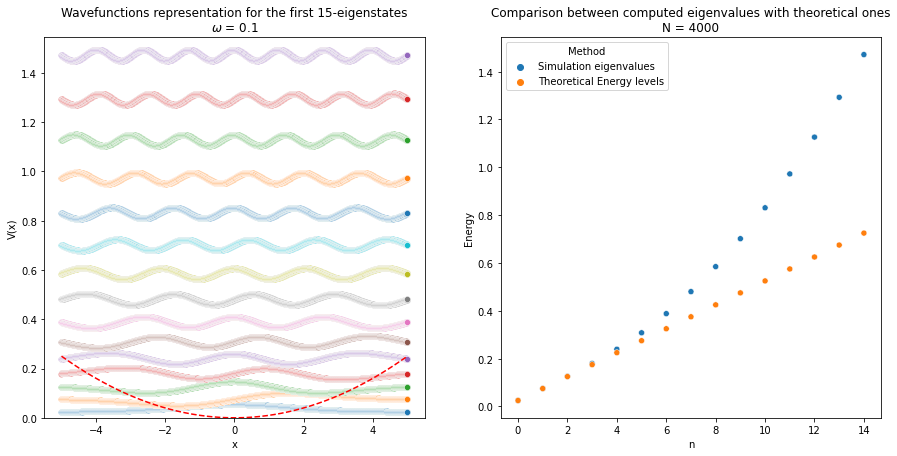

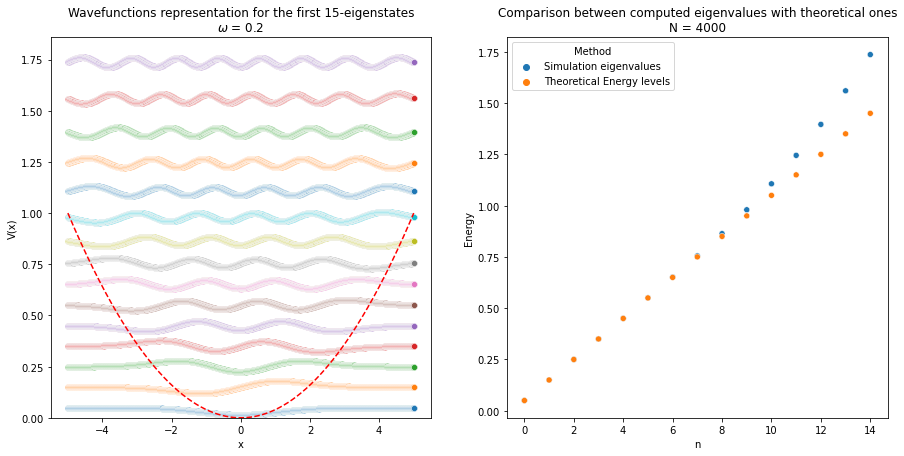

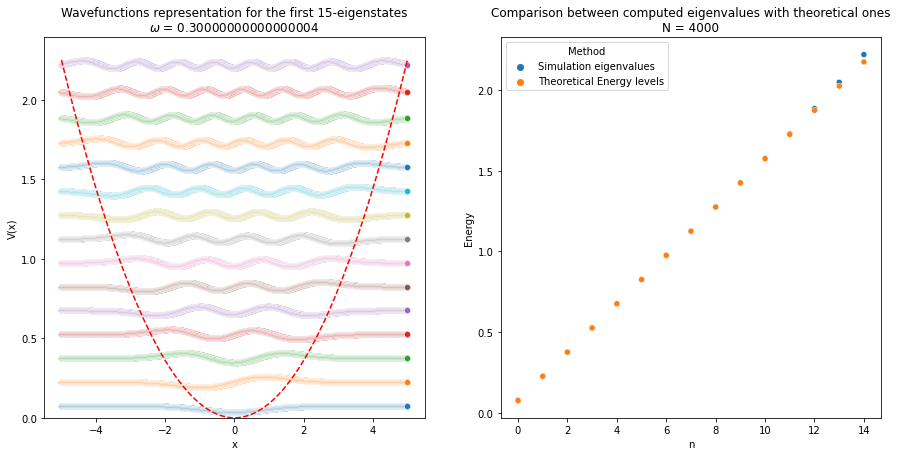

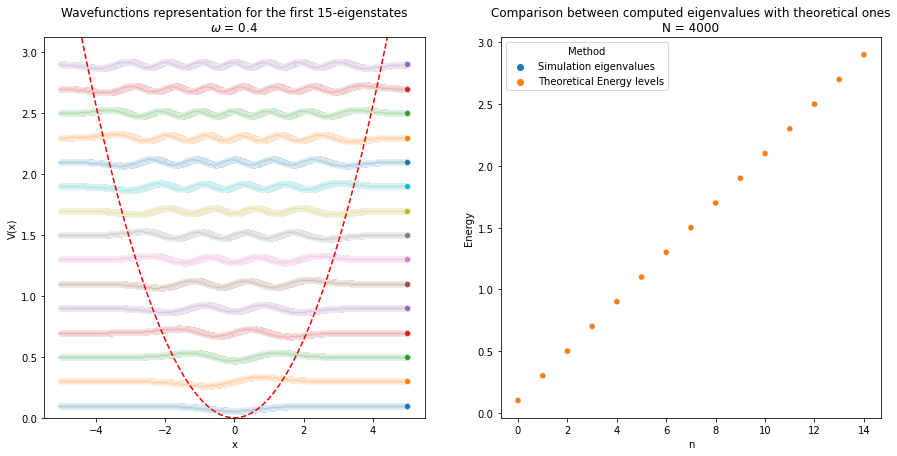

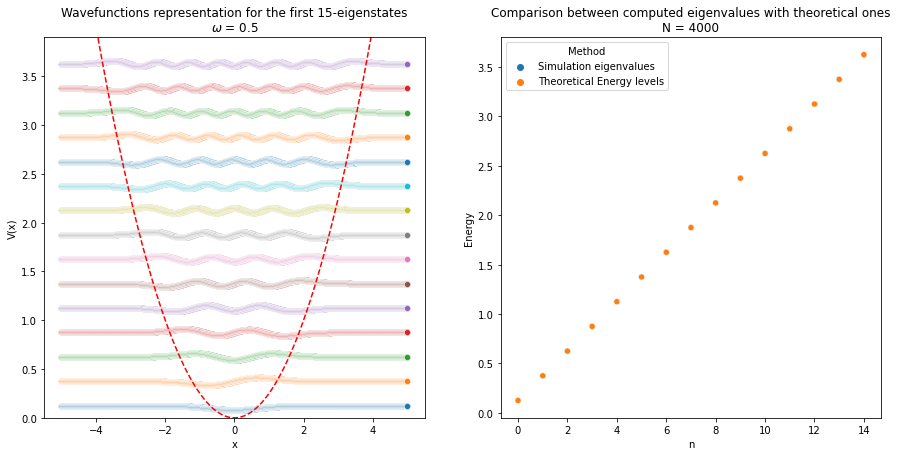

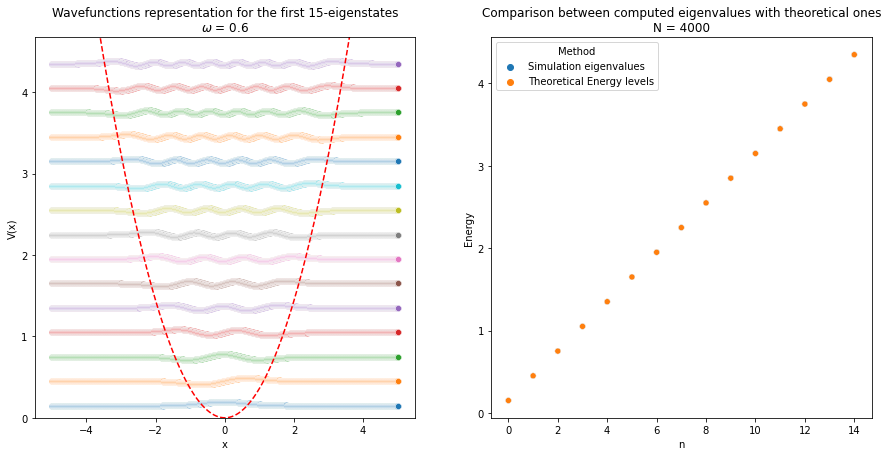

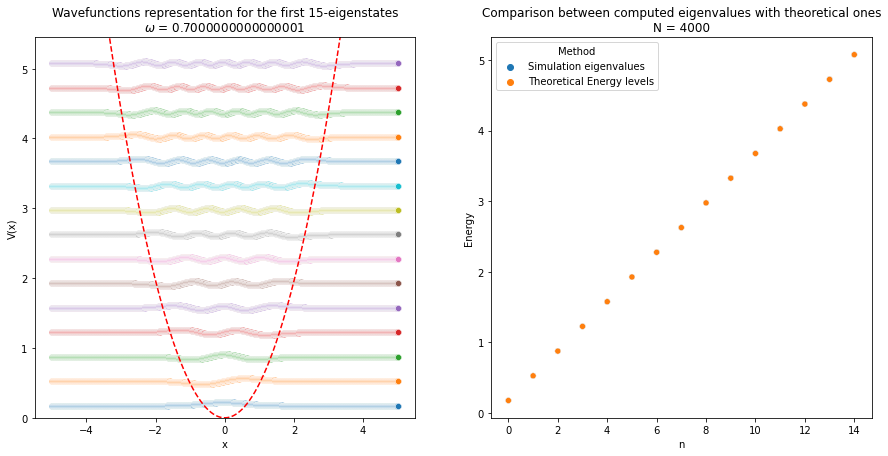

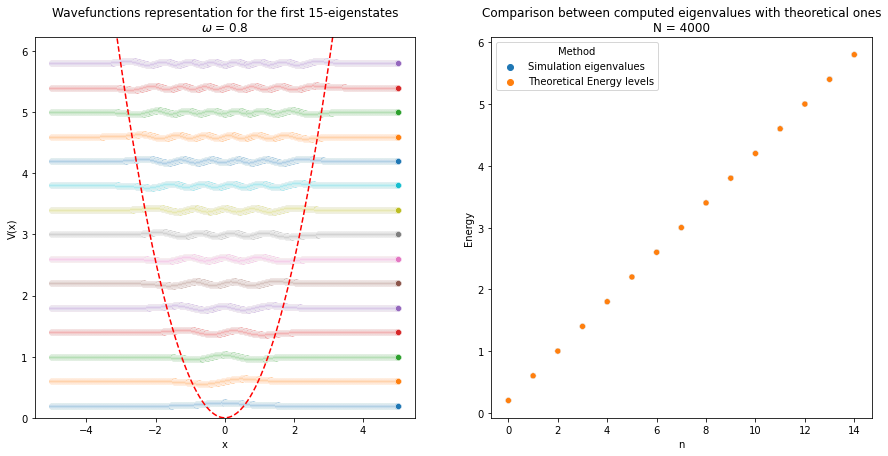

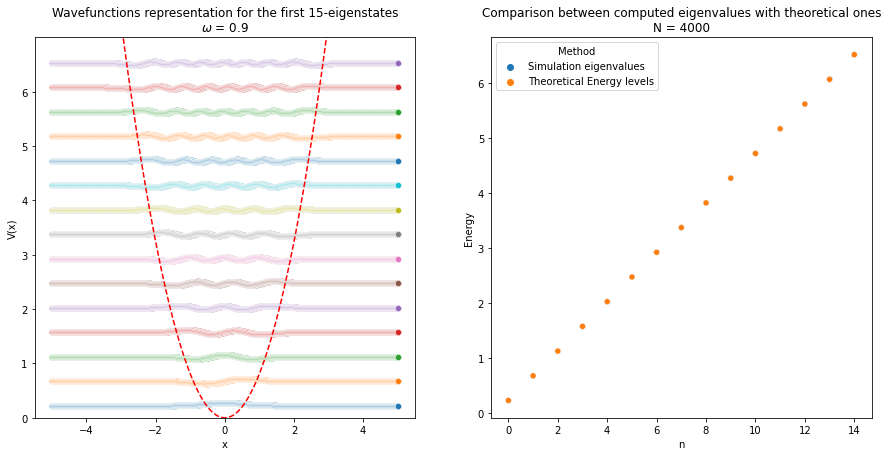

In [13]:
omega_change = []
error_omega = []
x_best = int(change_x[change_x['error'] == min(change_x['error'])]['x'])

for w in np.arange(0.1,1,0.1):
    omega_change.append(w)
    error_omega.append(plot_harmonic_oscillator(w, x_best, best_N, k_eigenval))

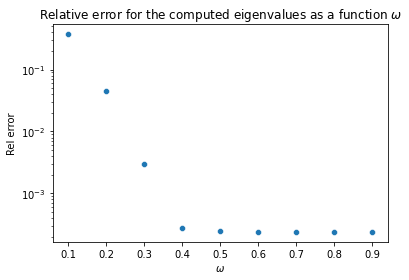

In [14]:
sns.scatterplot(x=omega_change, y=error_omega).set(xlabel='$\omega$', ylabel='Rel error', 
                             title='Relative error for the computed eigenvalues as a function $\omega$')

plt.yscale('log')

#### Some more results

0.3998510280409693

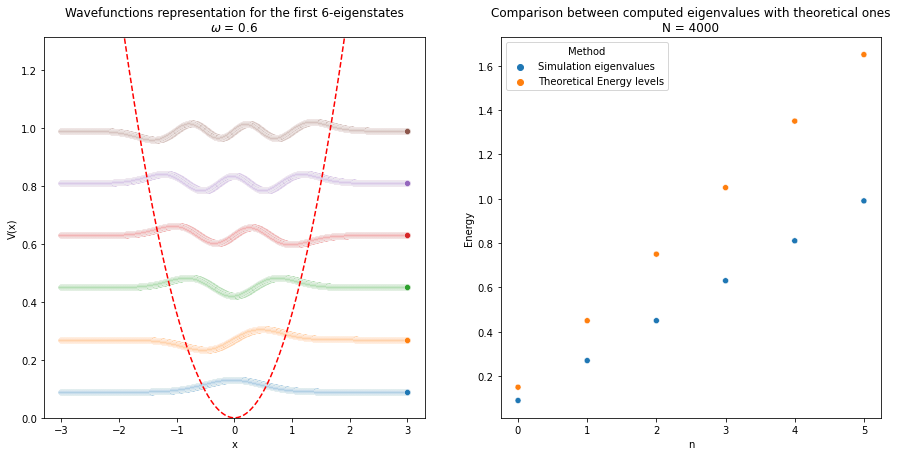

In [15]:
plot_harmonic_oscillator(0.6, 3, 4000, 6)

0.0002673194484408244

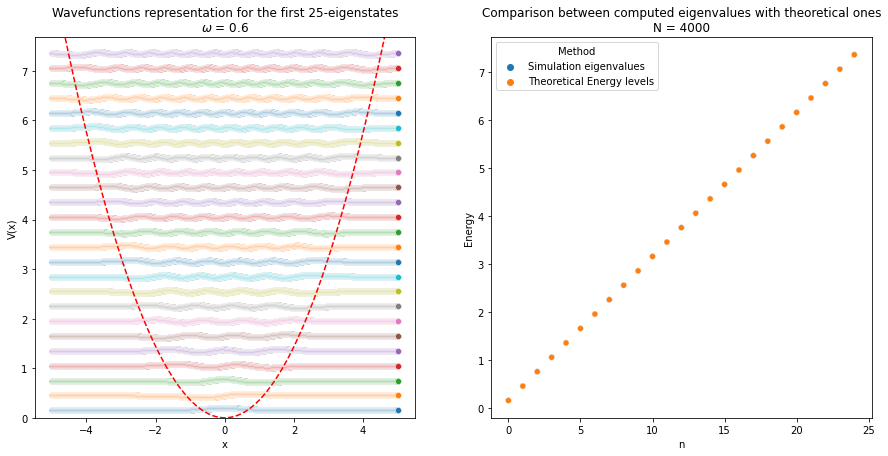

In [16]:
plot_harmonic_oscillator(0.6, 5, 4000, 25)

0.05635972292182823

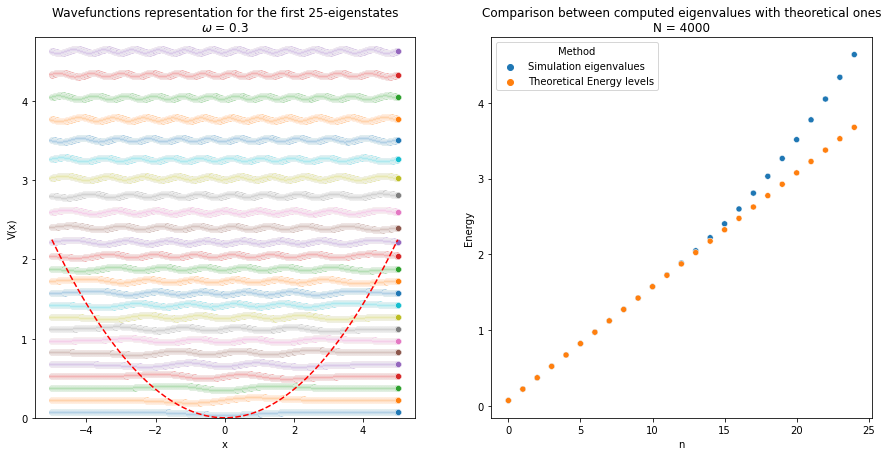

In [17]:
plot_harmonic_oscillator(0.3, 5,4000,25)

In [19]:
eig_val_test = harmonic_oscillator(0.3, 5,4000,25)[0]

In [20]:
E_theo_test = [(0.3/2)*(i + 0.5) for i in range(25)]

In [21]:
pd.DataFrame({'Simulated': eig_val_test, 'Theoretical': E_theo_test})

,Simulated,Theoretical
0,0.075019,0.075
1,0.225056,0.225
2,0.375093,0.375
3,0.525130,0.525
4,0.675167,0.675
5,0.825204,0.825
6,0.975243,0.975
7,1.125293,1.125
8,1.275395,1.275
9,1.425705,1.425
